In [1]:
import requests 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np 


In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
CLIENT_ID = YOUR_CLIENT_ID
CLIENT_SECRET = YOUR_CLIENT_SECRET

BASE_URL = "https://api.spotify.com/v1/"

In [4]:
auth_response = requests.post("https://accounts.spotify.com/api/token", {
    "grant_type": "client_credentials",
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
})

auth_response_json = auth_response.json()

access_token = auth_response_json["access_token"]

In [5]:
headers = {"Authorization": f"Bearer {access_token}"}

In [6]:
# This is to send request 
def send_request(send_type_,id_,remaining_ = ""):
    return requests.get(BASE_URL + send_type_ +"/"+ id_ + "/"+remaining_, headers=headers).json()

In [7]:
myPlaylistID = YOUR_PLAYLIST
myPlaylist = send_request("playlists", myPlaylistID,"tracks")

In [8]:
# This is to get the song ID of a song
def get_id(dict_):
    return dict_["track"]["id"]

In [9]:
# This is to get all details of a song 
def getSongDetail(trackID_):
    # Get the audio feature of a song 
    audioFeatures = send_request("audio-features" , trackID_)
    # Get the information of a song 
    songDetails = send_request("tracks", trackID_)
    songName = songDetails["name"]
    artists = songDetails["artists"]
    artistsName = [x["name"] for x in artists]
    # Combine all into a dict
    return {**{"Song_Name": songName, "Artists": artistsName},**audioFeatures}

In [10]:
mySongs = []
for song in myPlaylist["items"]:
    mySongs.append(getSongDetail(get_id(song)))

In [11]:
mySongsDF = pd.DataFrame(mySongs)

In [12]:
mySongsDF.head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,21 Guns,[Green Day],0.268,0.742,5,-4.939,1,0.0355,0.05180,0.000000,0.6260,0.416,159.779,audio_features,64yrDBpcdwEdNY9loyEGbX,spotify:track:64yrDBpcdwEdNY9loyEGbX,https://api.spotify.com/v1/tracks/64yrDBpcdwEd...,https://api.spotify.com/v1/audio-analysis/64yr...,321093,4
1,Wake Me up When September Ends,[Green Day],0.546,0.814,7,-5.146,1,0.0314,0.02300,0.000000,0.0972,0.146,104.980,audio_features,3ZffCQKLFLUvYM59XKLbVm,spotify:track:3ZffCQKLFLUvYM59XKLbVm,https://api.spotify.com/v1/tracks/3ZffCQKLFLUv...,https://api.spotify.com/v1/audio-analysis/3Zff...,285653,4
2,After the Afterparty (feat. Lil Yachty),"[Charli XCX, Lil Yachty]",0.653,0.794,7,-3.828,1,0.0894,0.12100,0.000000,0.3650,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
3,All My Friends (feat. Tinashe & Chance the Rap...,"[Snakehips, Tinashe, Chance the Rapper]",0.681,0.521,0,-5.849,1,0.1410,0.12000,0.000084,0.1080,0.181,94.997,audio_features,6TaqooOXAEcijL6G1AWS2K,spotify:track:6TaqooOXAEcijL6G1AWS2K,https://api.spotify.com/v1/tracks/6TaqooOXAEci...,https://api.spotify.com/v1/audio-analysis/6Taq...,229747,4
4,Bad (feat. Vassy) - Radio Edit,"[David Guetta, Showtek, VASSY]",0.614,0.972,5,-3.927,0,0.0880,0.00125,0.018600,0.3280,0.411,127.966,audio_features,6eIacmhkE82vZlMDnGS7aP,spotify:track:6eIacmhkE82vZlMDnGS7aP,https://api.spotify.com/v1/tracks/6eIacmhkE82v...,https://api.spotify.com/v1/audio-analysis/6eIa...,170625,4


https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject

AudioFeaturesObject

acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	

duration_ms

The duration of the track in milliseconds.	

energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.	


instrumentalness

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 

liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.	

loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.	

mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.	

speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.	

tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.	

time_signature

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).	

valence

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	

In [13]:
numeric_Variable = ["danceability", "energy",  "loudness", "speechiness",
       "acousticness", "instrumentalness", "liveness", "valence", "tempo","duration_ms"]
mySongsNumericDF = mySongsDF[numeric_Variable]

# This is to standardize all numeric variables
mysongsScaler = StandardScaler().fit(mySongsNumericDF)
mysongsNormalizedDF = mysongsScaler.transform(mySongsNumericDF)

In [14]:
# This is to return the sum of squared distances of samples to their closest cluster center.
def get_inertia(n_cluster_,df_):
    return  KMeans(n_clusters = n_cluster_, random_state= 42).fit(df_).inertia_

In [15]:
mySongSqDistance = []
for i in range(1,10):
    mySongSqDistance.append(get_inertia(i,mysongsNormalizedDF))

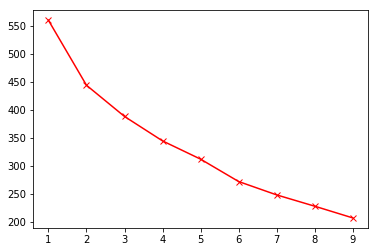

In [16]:
plt.plot(range(1,10), mySongSqDistance, "rx-")
plt.show()

In [17]:
kMeansResult = KMeans(n_clusters = 2, random_state= 42).fit(mysongsNormalizedDF)

In [18]:
kMeansResult.labels_

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [19]:
Counter(kMeansResult.labels_)

Counter({1: 18, 0: 38})

In [20]:
print(sum(kMeansResult.labels_))
print(len(kMeansResult.labels_))

18
56


In [21]:
kMeansResult.cluster_centers_

array([[ 0.36803159,  0.45419511,  0.4427507 ,  0.24497025, -0.3474188 ,
         0.01698571,  0.01494293,  0.1987878 , -0.30483948, -0.35954821],
       [-0.77695558, -0.95885634, -0.93469591, -0.51715941,  0.73343969,
        -0.03585873, -0.03154619, -0.41966314,  0.64355002,  0.75904622]])

In [22]:
mySongsDF["kCluster"] = kMeansResult.labels_.tolist()

In [23]:
list(mySongsDF[mySongsDF["kCluster"]==1]["Song_Name"])

['21 Guns',
 'Born To Die',
 'drivers license',
 'Dusk Till Dawn - Radio Edit',
 'Faded',
 '反高潮',
 '我的快樂時代',
 '黃金時代',
 '浮誇',
 '節外生枝',
 'Summertime Sadness',
 'Bloodstream',
 '發現號',
 '擇日失戀',
 'Home',
 'Baby Now',
 '吃鯨魚的人',
 '羅生門']

In [24]:
playlist_id = "1tPWTwuxOLsE2Do1JQSUxA"
playlist = send_request("playlists", playlist_id,"tracks")

In [25]:
playlist_songs = []
for song in playlist["items"]:
    playlist_songs.append(getSongDetail(get_id(song)))

In [26]:
playlist_songsDF = pd.DataFrame(playlist_songs)
playlist_songsNumericDF = playlist_songsDF[numeric_Variable]

In [27]:
playlist_songsNormalizedDF = mysongsScaler.transform(playlist_songsNumericDF)
playlist_songsPredict = kMeansResult.predict(playlist_songsNormalizedDF)

In [28]:
playlist_songsDF["kCluster"] = playlist_songsPredict

In [29]:
playlist_songsDF[playlist_songsDF["kCluster"]==1].head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster
4,Another Love,[Tom Odell],0.445,0.537,4,-8.532,0,0.0400,0.6950,0.000017,...,0.131,122.769,audio_features,3JvKfv6T31zO0ini8iNItO,spotify:track:3JvKfv6T31zO0ini8iNItO,https://api.spotify.com/v1/tracks/3JvKfv6T31zO...,https://api.spotify.com/v1/audio-analysis/3JvK...,244360,4,1
17,Wrecking Ball,[Miley Cyrus],0.530,0.422,5,-6.262,1,0.0342,0.4070,0.000000,...,0.349,119.964,audio_features,2vwlzO0Qp8kfEtzTsCXfyE,spotify:track:2vwlzO0Qp8kfEtzTsCXfyE,https://api.spotify.com/v1/tracks/2vwlzO0Qp8kf...,https://api.spotify.com/v1/audio-analysis/2vwl...,221360,4,1
32,Say You Won't Let Go,[James Arthur],0.358,0.557,10,-7.398,1,0.0590,0.6950,0.000000,...,0.494,85.043,audio_features,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh,https://api.spotify.com/v1/tracks/5uCax9HTNlzG...,https://api.spotify.com/v1/audio-analysis/5uCa...,211467,4,1
34,Strong,[London Grammar],0.326,0.404,10,-10.786,1,0.0383,0.7410,0.000028,...,0.269,77.628,audio_features,3rDK6tRoFhZoytOhlnK2VO,spotify:track:3rDK6tRoFhZoytOhlnK2VO,https://api.spotify.com/v1/tracks/3rDK6tRoFhZo...,https://api.spotify.com/v1/audio-analysis/3rDK...,275794,4,1
38,Another Love - Zwette Edit,"[Tom Odell, Zwette]",0.870,0.554,4,-5.828,0,0.0635,0.0802,0.073900,...,0.462,123.998,audio_features,5snyhxAh55A2wlNRH7VVZJ,spotify:track:5snyhxAh55A2wlNRH7VVZJ,https://api.spotify.com/v1/tracks/5snyhxAh55A2...,https://api.spotify.com/v1/audio-analysis/5sny...,394573,4,1


In [30]:
list(playlist_songsDF[playlist_songsDF["kCluster"]==1]["Song_Name"])

['Another Love',
 'Wrecking Ball',
 "Say You Won't Let Go",
 'Strong',
 'Another Love - Zwette Edit',
 'Beneath Your Beautiful (feat. Emeli Sandé)',
 'River',
 'Scared to Be Lonely',
 'Night Changes',
 'Dusk Till Dawn - Radio Edit',
 'Train Wreck',
 'Empire State of Mind (Part II) Broken Down',
 'Budapest',
 'Love Yourself',
 'Someone Like You',
 'Take Me To Church',
 'Hello',
 'Shallow',
 'Impossible']

In [31]:
list(zip(playlist_songsNormalizedDF,playlist_songsPredict))[0]

(array([-0.0200108 ,  1.0179628 ,  1.2232872 , -0.53131263, -0.64901548,
        -0.03349432, -0.40530312,  1.6106398 ,  0.1204663 , -0.13818725]), 0)

In [32]:
playlist_songsDF["Distance_to_Centroid"]=[np.linalg.norm(
    result[0]-kMeansResult.cluster_centers_[result[1]]) 
    for result in list(zip(playlist_songsNormalizedDF,
                           playlist_songsPredict))
]

In [33]:
playlist_songsDF.head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster,Distance_to_Centroid
0,Summer,[Calvin Harris],0.596,0.856,4,-3.556,0,0.0346,0.021100,0.017800,...,127.949,audio_features,6YUTL4dYpB9xZO5qExPf05,spotify:track:6YUTL4dYpB9xZO5qExPf05,https://api.spotify.com/v1/tracks/6YUTL4dYpB9x...,https://api.spotify.com/v1/audio-analysis/6YUT...,222533,4,0,2.042937
1,So What,[P!nk],0.537,0.866,11,-3.080,0,0.0445,0.000308,0.000001,...,126.003,audio_features,49KhRYxcukqBtmeSy44s2B,spotify:track:49KhRYxcukqBtmeSy44s2B,https://api.spotify.com/v1/tracks/49KhRYxcukqB...,https://api.spotify.com/v1/audio-analysis/49Kh...,215160,4,0,2.240209
2,Best Song Ever,[One Direction],0.652,0.877,1,-2.986,1,0.0465,0.022700,0.000000,...,118.491,audio_features,5T7ZFtCcOgkpjxcuaeZbw0,spotify:track:5T7ZFtCcOgkpjxcuaeZbw0,https://api.spotify.com/v1/tracks/5T7ZFtCcOgkp...,https://api.spotify.com/v1/audio-analysis/5T7Z...,200107,4,0,1.800763
3,Power (feat. Stormzy),"[Little Mix, Stormzy]",0.586,0.865,7,-4.092,1,0.3190,0.034500,0.000006,...,172.912,audio_features,4QVFtAswXqPoAWRLo5yu8a,spotify:track:4QVFtAswXqPoAWRLo5yu8a,https://api.spotify.com/v1/tracks/4QVFtAswXqPo...,https://api.spotify.com/v1/audio-analysis/4QVF...,242293,4,0,3.651822
4,Another Love,[Tom Odell],0.445,0.537,4,-8.532,0,0.0400,0.695000,0.000017,...,122.769,audio_features,3JvKfv6T31zO0ini8iNItO,spotify:track:3JvKfv6T31zO0ini8iNItO,https://api.spotify.com/v1/tracks/3JvKfv6T31zO...,https://api.spotify.com/v1/audio-analysis/3JvK...,244360,4,1,2.286297


In [34]:
list(playlist_songsDF[playlist_songsDF["kCluster"]==1].nsmallest(5,"Distance_to_Centroid")['Song_Name'])

['Wrecking Ball', 'Hello', 'Scared to Be Lonely', 'Another Love', 'Shallow']

In [35]:
playlist_songsDF[playlist_songsDF["kCluster"]==0].nsmallest(5,"Distance_to_Centroid")

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster,Distance_to_Centroid
39,Ugly Heart,[G.R.L.],0.649,0.790,9,-5.529,1,0.0482,0.0167,0.000000,...,124.993,audio_features,1Vv0MPcooEoQzVZYfKMgKW,spotify:track:1Vv0MPcooEoQzVZYfKMgKW,https://api.spotify.com/v1/tracks/1Vv0MPcooEoQ...,https://api.spotify.com/v1/audio-analysis/1Vv0...,199580,4,0,1.069008
79,Till the World Ends,[Britney Spears],0.693,0.705,8,-5.747,1,0.0665,0.0228,0.000000,...,131.951,audio_features,38iU2jg98IZZEIJPrP7aWD,spotify:track:38iU2jg98IZZEIJPrP7aWD,https://api.spotify.com/v1/tracks/38iU2jg98IZZ...,https://api.spotify.com/v1/audio-analysis/38iU...,237947,4,0,1.206723
93,Ghost,[Ella Henderson],0.680,0.840,9,-3.823,1,0.0414,0.0457,0.000009,...,104.975,audio_features,4XPWKmy05Rcff6TLHNoNF8,spotify:track:4XPWKmy05Rcff6TLHNoNF8,https://api.spotify.com/v1/tracks/4XPWKmy05Rcf...,https://api.spotify.com/v1/audio-analysis/4XPW...,213213,4,0,1.272349
67,Just the Way You Are,[Bruno Mars],0.637,0.843,5,-5.413,1,0.0432,0.0151,0.000000,...,109.012,audio_features,47Slg6LuqLaX0VodpSCvPt,spotify:track:47Slg6LuqLaX0VodpSCvPt,https://api.spotify.com/v1/tracks/47Slg6LuqLaX...,https://api.spotify.com/v1/audio-analysis/47Sl...,220733,4,0,1.303839
35,Braveheart,[Neon Jungle],0.703,0.730,5,-3.595,0,0.1060,0.1890,0.000015,...,128.017,audio_features,0XUvhSzizkEtPgBr1BZ2an,spotify:track:0XUvhSzizkEtPgBr1BZ2an,https://api.spotify.com/v1/tracks/0XUvhSzizkEt...,https://api.spotify.com/v1/audio-analysis/0XUv...,224200,4,0,1.372395
